### Analysis the syzygy moments of Sun, Earth, and Moon
* Note that in the context of Chinese calendar, syzygy means "朔望", which can be defined as: the apparent longitudes of Sun and Moon are equal.

In [1]:
import common
from datetime import datetime, timedelta

# Generate the data for every day starting from 2000-01-01.
FIRST_DATE = datetime(2020, 1, 1)
datetimes = [FIRST_DATE + timedelta(hours=i) for i in range(0, 365 * 20 * 24)]

# Compute the sun longitude for each date. 
# Simply assume `fraction` is 0.0 (which means we are calculating the longitude of the moment 00:00:00 of the date).
jdes = [common.ut1_to_jde(dt.year, dt.month, dt.day, dt.hour / 24) for dt in datetimes]

sun_coords = [common.sun_apparent_geocentric_coord(jde) for jde in jdes]
sun_longitudes = [sun_coord.lon for sun_coord in sun_coords]

moon_coords = [common.moon_apparent_geocentric_coord(jde) for jde in jdes]
moon_longitudes = [coord.lon for coord in moon_coords]

In [2]:
# Put the data into a dataframe.
assert len(datetimes) == len(sun_longitudes)

import pandas as pd
sun_df = pd.DataFrame({
  'datetime': datetimes,
  'sun_longitude': sun_longitudes
})

sun_df['datetime'] = pd.to_datetime(sun_df['datetime'])

sun_df

,datetime,sun_longitude
0,2020-01-01 00:00:00,280.009519
1,2020-01-01 01:00:00,280.051997
2,2020-01-01 02:00:00,280.094474
3,2020-01-01 03:00:00,280.136951
4,2020-01-01 04:00:00,280.179428
...,...,...
175195,2039-12-26 19:00:00,274.851635
175196,2039-12-26 20:00:00,274.894076
175197,2039-12-26 21:00:00,274.936518
175198,2039-12-26 22:00:00,274.978959


In [3]:
max_sun_longitude = sun_df['sun_longitude'].max()
min_sun_longitude = sun_df['sun_longitude'].min()

# Display the results
print(f"Maximum sun longitude: {max_sun_longitude}")
print(f"Minimum sun longitude: {min_sun_longitude}")

Maximum sun longitude: 359.9989866628214
Minimum sun longitude: 0.005473671083308678


In [4]:
# Put the data into a dataframe.
assert len(datetimes) == len(moon_longitudes)

import pandas as pd
moon_df = pd.DataFrame({
  'datetime': datetimes,
  'moon_longitude': moon_longitudes
})

moon_df['datetime'] = pd.to_datetime(moon_df['datetime'])

moon_df

,datetime,moon_longitude
0,2020-01-01 00:00:00,346.139019
1,2020-01-01 01:00:00,346.635232
2,2020-01-01 02:00:00,347.131305
3,2020-01-01 03:00:00,347.627242
4,2020-01-01 04:00:00,348.123049
...,...,...
175195,2039-12-26 19:00:00,54.503316
175196,2039-12-26 20:00:00,54.999838
175197,2039-12-26 21:00:00,55.496168
175198,2039-12-26 22:00:00,55.992310


In [5]:
# Calculate the maximum and minimum values of moon_longitude
max_moon_longitude = moon_df['moon_longitude'].max()
min_moon_longitude = moon_df['moon_longitude'].min()

# Display the results
print(f"Maximum moon longitude: {max_moon_longitude}")
print(f"Minimum moon longitude: {min_moon_longitude}")

Maximum moon longitude: 359.9991454586362
Minimum moon longitude: 0.001575694106498052


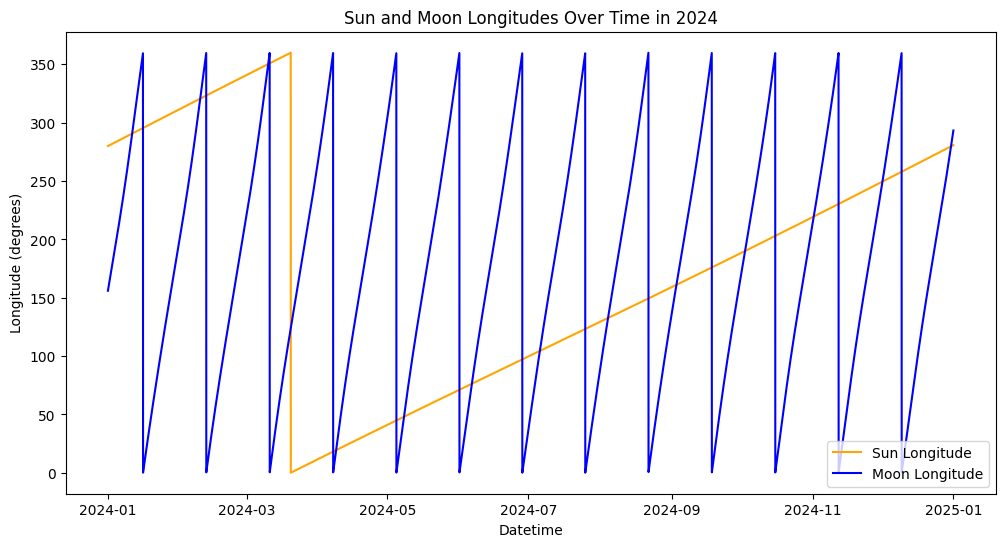

In [6]:
import matplotlib.pyplot as plt

# Filter for the year 2024
sun_df_2024 = sun_df[sun_df['datetime'].dt.year == 2024]
moon_df_2024 = moon_df[moon_df['datetime'].dt.year == 2024]

# Plotting for the year 2024
plt.figure(figsize=(12, 6))

# Plot sun longitudes for 2024
plt.plot(sun_df_2024['datetime'], sun_df_2024['sun_longitude'], label='Sun Longitude', color='orange')

# Plot moon longitudes for 2024
plt.plot(moon_df_2024['datetime'], moon_df_2024['moon_longitude'], label='Moon Longitude', color='blue')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude (degrees)')
plt.title('Sun and Moon Longitudes Over Time in 2024')
plt.legend()

# Display the plot
plt.show()

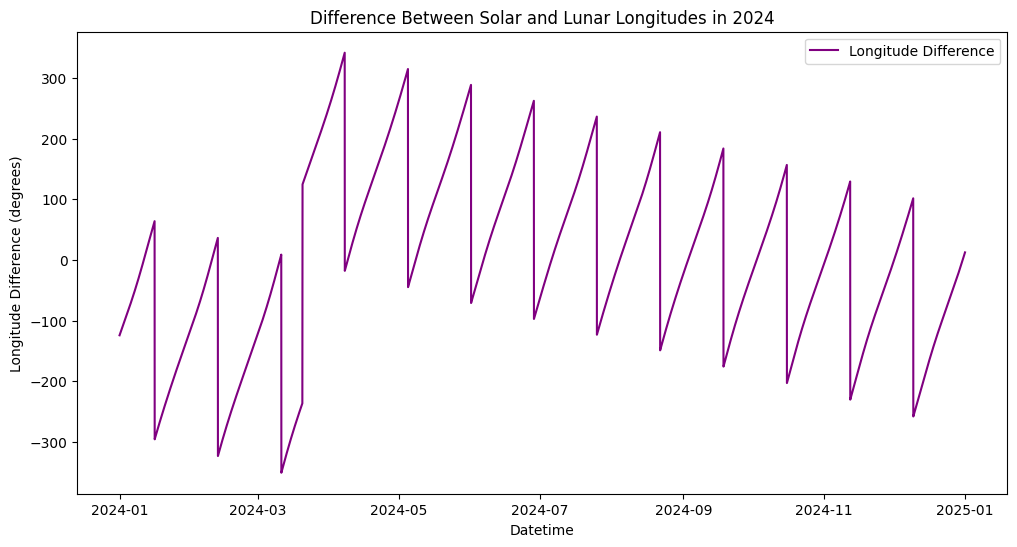

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the two DataFrames on the datetime column
merged_df_2024 = pd.merge(sun_df_2024, moon_df_2024, on='datetime', suffixes=('_sun', '_moon'))

# Calculate the difference between sun and moon longitudes
merged_df_2024['longitude_difference'] = merged_df_2024['moon_longitude'] - merged_df_2024['sun_longitude']

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2024['datetime'], merged_df_2024['longitude_difference'], label='Longitude Difference', color='purple')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude Difference (degrees)')
plt.title('Difference Between Solar and Lunar Longitudes in 2024')
plt.legend()

# Display the plot
plt.show()

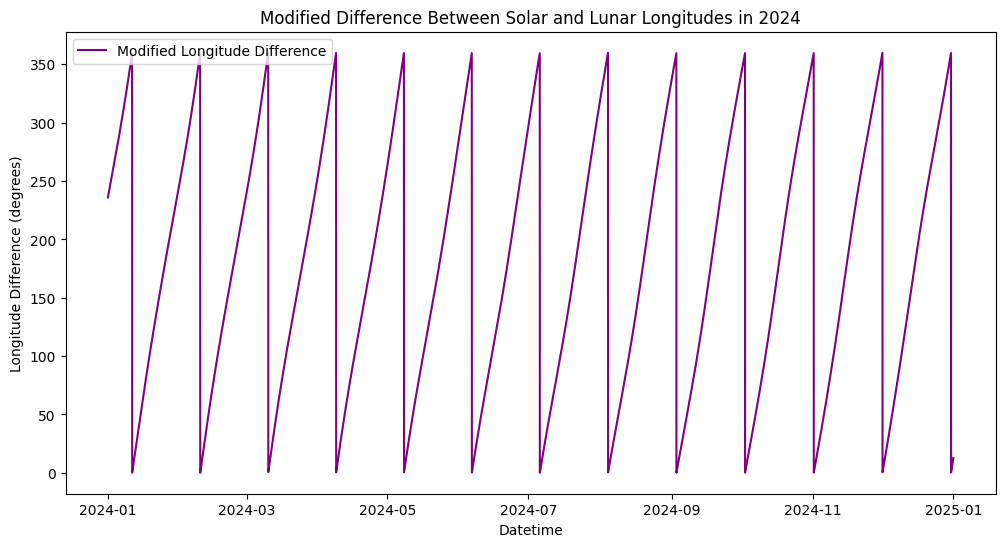

In [8]:
# Calculate the difference between sun and moon longitudes
merged_df_2024['longitude_difference'] = merged_df_2024['moon_longitude'] - merged_df_2024['sun_longitude']

# Define the function
def modify_diff(diff):
  diff = diff % 360.0
  return diff

# Apply the function to the longitude difference
merged_df_2024['modified_longitude_difference'] = merged_df_2024['longitude_difference'].apply(modify_diff)

# Plotting the modified difference
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2024['datetime'], merged_df_2024['modified_longitude_difference'], label='Modified Longitude Difference', color='purple')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude Difference (degrees)')
plt.title('Modified Difference Between Solar and Lunar Longitudes in 2024')
plt.legend()

# Display the plot
plt.show()